In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [146]:
from sklearn.datasets import load_boston 
boston = load_boston() 
bos = pd.DataFrame(boston.data) 

In [147]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [148]:
y=pd.DataFrame(boston.target,columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [149]:
bos.columns=boston.feature_names

In [150]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

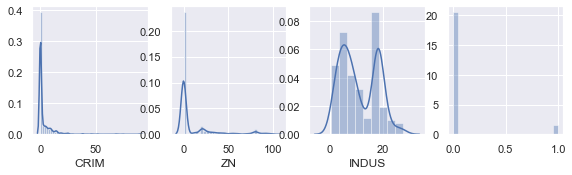

In [21]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for columns in bos:
    if plotnumber <14:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(bos[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.tight_layout()

In [15]:
bos.dtypes
sns.distplot(bos[NOX])

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

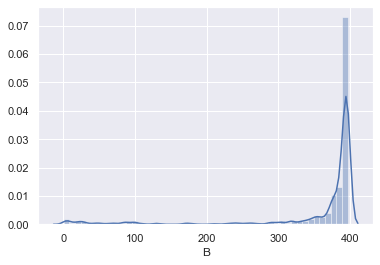

In [24]:
sns.distplot(bos['B'])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

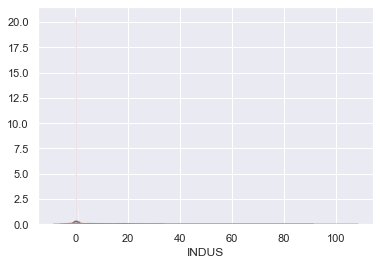

In [20]:
for columns in bos:
    sns.distplot(bos[columns])

In [37]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [39]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


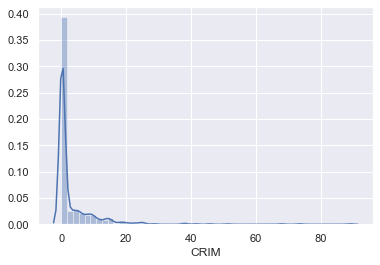

In [40]:
sns.distplot(bos['CRIM'])

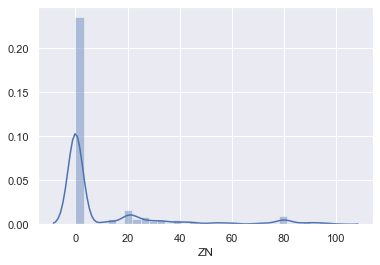

In [46]:
sns.distplot(bos['ZN'])

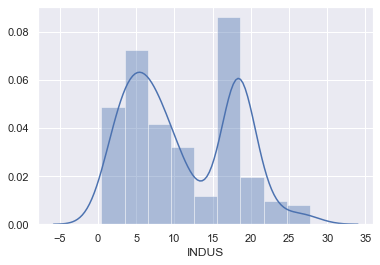

In [47]:
sns.distplot(bos['INDUS'])

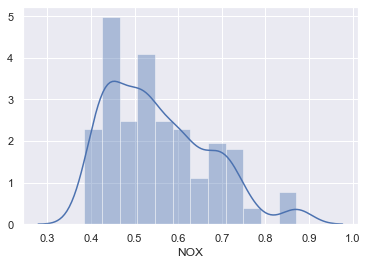

In [57]:
sns.distplot(bos['NOX'])

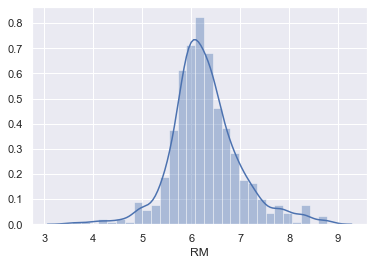

In [58]:
sns.distplot(bos['RM'])

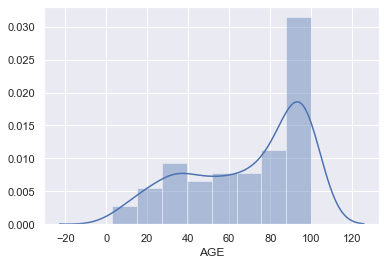

In [59]:
sns.distplot(bos['AGE'])

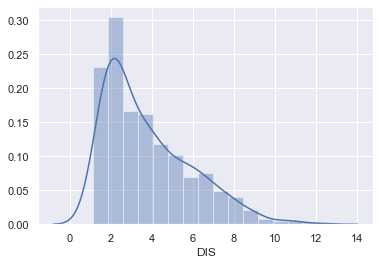

In [60]:
sns.distplot(bos['DIS'])

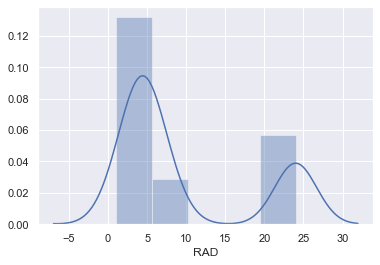

In [61]:
sns.distplot(bos['RAD'])

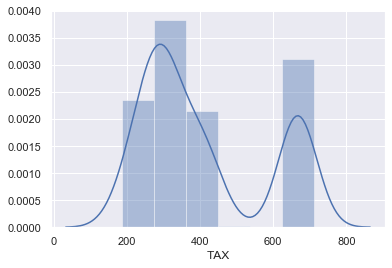

In [62]:
sns.distplot(bos['TAX'])

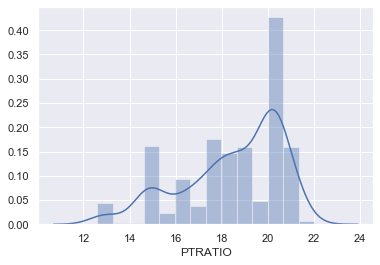

In [63]:
sns.distplot(bos['PTRATIO'])

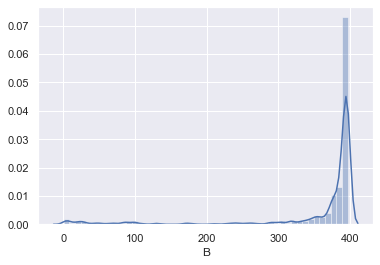

In [64]:
sns.distplot(bos['B'])

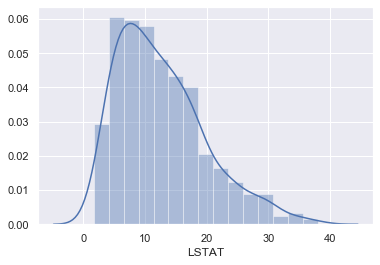

In [65]:
sns.distplot(bos['LSTAT'])

In [70]:
skew=[]
for i in bos:
    skew.append(bos[i].skew())

In [72]:
skew=pd.DataFrame(skew,columns=['skewness'])

In [73]:
features=[]
for i in bos:
    features.append(i)

In [74]:
features=pd.DataFrame(features,columns=['features'])

In [76]:
result=pd.concat([features,skew],axis=1)
result

,features,skewness
0,CRIM,5.223149
1,ZN,2.225666
2,INDUS,0.295022
3,CHAS,3.405904
4,NOX,0.729308
5,RM,0.403612
6,AGE,-0.598963
7,DIS,1.011781
8,RAD,1.004815
9,TAX,0.669956


In [151]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(bos)

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = bos.columns

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scaled

vif=pd.DataFrame()

vif['VIF']=[variance_inflation_factor(variables,i)   for i in range(variables.shape[1])]

vif['Features']=bos.columns


In [154]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [155]:
bos_drop_rad=bos.drop('RAD',axis=1)

In [156]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(bos_drop_rad)

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scaled

vif=pd.DataFrame()

vif['VIF']=[variance_inflation_factor(variables,i)   for i in range(variables.shape[1])]

vif['Features']=bos_drop_rad.columns
vif

,VIF,Features
0,1.664471,CRIM
1,2.273018,ZN
2,3.682265,INDUS
3,1.061561,CHAS
4,4.304929,NOX
5,1.885425,RM
6,3.083009,AGE
7,3.954951,DIS
8,3.415289,TAX
9,1.734873,PTRATIO


In [158]:
X_scaled.shape

(506, 12)

In [159]:
x_trains,x_tests,y_trains,y_tests = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [160]:
regression = LinearRegression()

regression.fit(x_trains,y_trains)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
regression.score(x_trains,y_trains)


0.7222635507593163

In [162]:
regression.score(x_tests,y_tests)

0.7330599172441089

In [163]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [164]:
adj_r2(x_tests,y_tests)


0.7049609611645414

In [165]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_trains, y_trains)

F:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [166]:
alpha = lasscv.alpha_
alpha

0.005913224207167832

In [167]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_trains, y_trains)

Lasso(alpha=0.005913224207167832, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [168]:
lasso_reg.score(x_tests, y_tests)

0.7331600669882692

In [169]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_trains, y_trains)

RidgeCV(alphas=array([2.76550474e+00, 1.24997029e+00, 5.93785354e+00, 3.61227623e+00,
       5.11658211e+00, 4.64263957e+00, 9.33892969e+00, 8.32272438e+00,
       1.40717424e+00, 6.14685391e+00, 6.52380858e+00, 5.74736817e+00,
       8.83685965e+00, 2.33982325e+00, 5.93236454e-01, 2.35798765e+00,
       5.90906845e+00, 2.48578778e+00, 6.62113649e+00, 6.95904292e-03,
       7.99501958e+00, 9.70486498e+0...
       1.81034512e+00, 5.32060875e+00, 2.12848790e+00, 4.68114746e+00,
       6.16489495e+00, 8.48996559e+00, 6.26298895e+00, 6.42858902e+00,
       6.62078436e+00, 2.56126839e+00, 1.32788226e+00, 5.34273370e+00,
       9.00258075e+00, 3.64468043e+00, 7.58144034e+00, 4.83414526e-01,
       8.79981769e+00, 8.59689577e-01]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [170]:
ridgecv.alpha_

0.006959042917156211

In [173]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_trains, y_trains)

Ridge(alpha=0.006959042917156211, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [174]:
ridge_model.score(x_tests, y_tests)

0.7330590452533372

In [210]:
pred_y=regression.predict(x_tests)

In [211]:
pred_y=pd.DataFrame(pred_y,columns=['Predicted_Price'])

In [236]:
y_tests_new=pd.DataFrame(y_tests)
y_tests_new

,price
488,15.2
128,18.0
191,30.5
53,23.4
388,10.2
...,...
368,50.0
145,13.8
198,34.6
405,5.0


In [215]:
pred_y['Predicted_Price_round_new']=pred_y['Predicted_Price'].apply(lambda x:round(x,2))

In [217]:
pred_y.drop('Predicted_Price_round',axis=1,inplace=True)

In [219]:
pred_y.drop('Predicted_Price',axis=1,inplace=True)

In [220]:
pred_y

,Predicted_Price_round_new
0,15.34
1,20.11
2,31.08
3,23.14
4,6.24
...,...
122,19.77
123,14.01
124,35.56
125,10.48


In [224]:
y_tests.isnull().sum()

price    0
dtype: int64

In [251]:
y_new_tests=y_tests.values

In [252]:
y_new_tests=pd.DataFrame(y_new_tests,columns=['Actual'])

In [253]:
y_new_tests.head()

,Actual
0,15.2
1,18.0
2,30.5
3,23.4
4,10.2


In [255]:
final=pd.concat([y_new_tests,pred_y],axis=1)

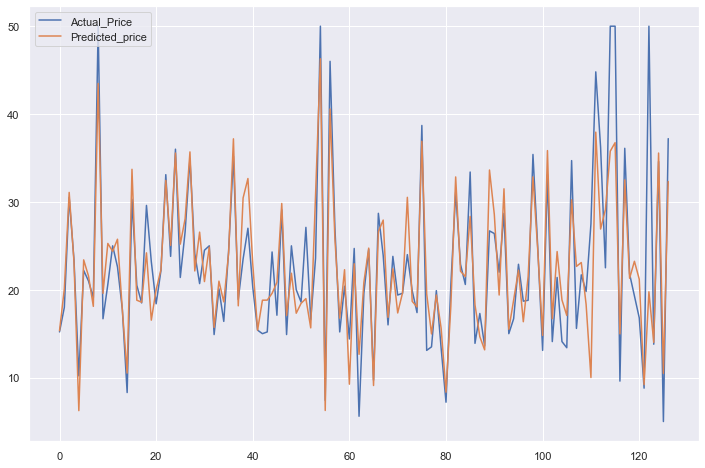

In [268]:
plt.figure(figsize=(12,8))

plt.plot(final)
plt.legend(['Actual_Price','Predicted_price'])